In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = []
for i in range(10):
    filename = './data/rf-lab/' + str(i+1) + '_data.txt'
    example = np.loadtxt(filename)
    data.append(example)

In [2]:
# plt.plot(arr[0], label='a')
# plt.figure()
# plt.plot(arr[1], label='b')
# plt.figure()
# plt.plot(arr2[0], label='c')
# plt.figure()
# plt.plot(arr2[1], label='d')

In [3]:
data = []
for i in range(6):
    for j in range(9): 
        filename = 'data/rf-lab/nine_movs_six_sub_split/' + str(i + 1) + '_' + str(j + 1) + '.txt'
        x = np.load(filename, allow_pickle=True)
        x = np.array(x)
        for line in x:
            line = np.insert(line,0,[i, j])
            data.append(line)
        
df = pd.DataFrame(data)
df = df.rename(columns={0: "subject", 1: "move"})
# display(df[df['move'] == 7])


In [4]:
from scipy.stats.stats import pearsonr

# print(pearsonr(arr[0],arr[1]))
# print(pearsonr(arr[0],arr2[1]))

In [5]:
subject_one = df['subject'] == 1
move_one = df['move'] == 0
first_subject_data = df[subject_one & move_one]

subject_two = df['subject'] == 2
second_subject_data = df[subject_two & move_one]


data1 = first_subject_data.drop(columns=['subject','move']).sample(1).values
data2 = second_subject_data.drop(columns=['subject','move']).sample(1).values

# display(data1.shape)


/Users/antonvasilev/PyCharmProjects/emg-interface/emg-env/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


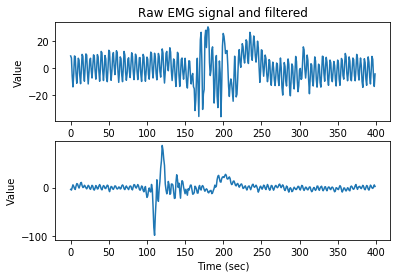

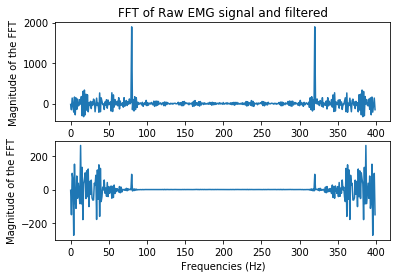

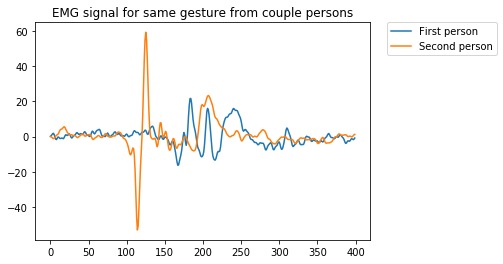

In [6]:
from scipy import signal
from scipy.fft import fft, ifft

def filter_signal(x):
    N = 10 
    Fc = 40
    Fs = 1600
    h = signal.firwin(numtaps=N, cutoff=40, nyq=Fs/2)
    y = signal.lfilter(h, 1.0, x)
    return y




plt.subplot(2, 1, 1)
plt.plot(data1[0], label='a')
plt.title('Raw EMG signal and filtered')
plt.ylabel('Value')

plt.subplot(2, 1, 2)
plt.plot(data2[0], label='b')
plt.ylabel('Value')
plt.xlabel('Time (sec)')

plt.figure()
filtered_signal_from_first_person = filter_signal(data1[0])
filtered_signal_from_second_person = filter_signal(data2[0])

# Fourier
y = fft(data1[0])
y2 = fft(filtered_signal_from_first_person)
plt.plot(y, label='noizy')
plt.plot(y2, label='filtered')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.subplot(2, 1, 1)
plt.plot(y)
plt.title('FFT of Raw EMG signal and filtered')
plt.ylabel('Magnitude of the FFT')

plt.subplot(2, 1, 2)
plt.plot(y2)
plt.xlabel('Frequencies (Hz)')
plt.ylabel('Magnitude of the FFT')
plt.show()


plt.figure()
plt.plot(filtered_signal_from_first_person, label='First person')
plt.plot(filtered_signal_from_second_person, label='Second person')
plt.title('EMG signal for same gesture from couple persons')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 16, 16, 64)        1664      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        18464     
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 400)               2509200   
Total params: 2,529,328
Trainable params: 2,529,328
Non-trainable params: 0
_________________________________________________________________


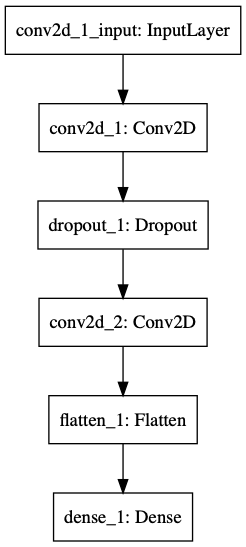

In [7]:
# Neural network model
!pip install pydot

from keras import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout
from keras.utils import plot_model


input_dim = 400
output_dim = 400

model = Sequential()
input_shape=(20,20,1,)
model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu", input_shape=input_shape))
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
model.add(Flatten())
model.add(Dense(400))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='emg_filtering_model.png')

In [8]:
X = df.drop(columns=['subject','move']).values
y = df.drop(columns=['subject','move']).values

for i in range(len(y)):
    y[i] = filter_signal(y[i])

X2 = np.zeros((len(X), 20, 20, 1))
for i in range(len(X)):
    data = X[i]
    X2[i] = np.reshape(data, (20,20,1))

X = X2

In [9]:

print(X.shape)
print(y.shape)
model.fit(X, y, verbose=2, epochs=20, batch_size=64)

(2820, 20, 20, 1)
(2820, 400)
Epoch 1/20
 - 3s - loss: 410.5939 - accuracy: 0.0277
Epoch 2/20
 - 2s - loss: 108.8625 - accuracy: 0.1099
Epoch 3/20
 - 2s - loss: 66.2359 - accuracy: 0.1766
Epoch 4/20
 - 2s - loss: 50.5751 - accuracy: 0.2284
Epoch 5/20
 - 2s - loss: 39.1515 - accuracy: 0.2965
Epoch 6/20
 - 2s - loss: 28.1720 - accuracy: 0.3426
Epoch 7/20
 - 2s - loss: 23.7962 - accuracy: 0.3681
Epoch 8/20
 - 2s - loss: 21.9455 - accuracy: 0.3968
Epoch 9/20
 - 2s - loss: 21.3296 - accuracy: 0.4145
Epoch 10/20
 - 2s - loss: 20.4319 - accuracy: 0.4199
Epoch 11/20
 - 2s - loss: 17.1779 - accuracy: 0.4404
Epoch 12/20
 - 2s - loss: 22.0172 - accuracy: 0.4184
Epoch 13/20
 - 2s - loss: 16.1457 - accuracy: 0.4560
Epoch 14/20
 - 2s - loss: 15.1467 - accuracy: 0.4571
Epoch 15/20
 - 2s - loss: 14.9876 - accuracy: 0.4635
Epoch 16/20
 - 2s - loss: 14.1521 - accuracy: 0.4915
Epoch 17/20
 - 2s - loss: 13.3179 - accuracy: 0.4855
Epoch 18/20
 - 2s - loss: 12.8358 - accuracy: 0.4961
Epoch 19/20
 - 2s - los

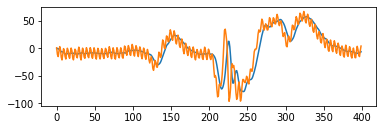

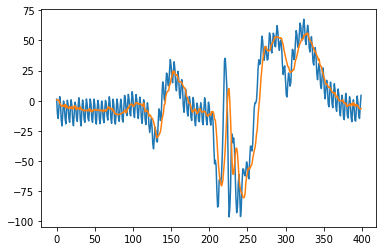

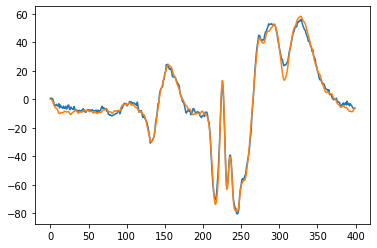

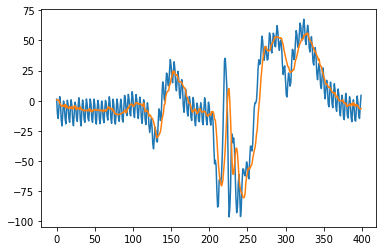

In [10]:

predicted = model.predict([[X[0]]])[0]
# print(predicted)

plt.subplot(2,1,1)
plt.plot(y[0])
plt.plot(X[0].reshape(400))

plt.figure()
plt.plot(X[0].reshape(400))
plt.plot(predicted)

plt.figure()
plt.plot(predicted)
plt.plot(y[0])

plt.figure()
plt.plot(X[0].reshape(400))
plt.plot(predicted)

# Статистика по сигналу
## Дисперсия между одним жестом и разными субъектами

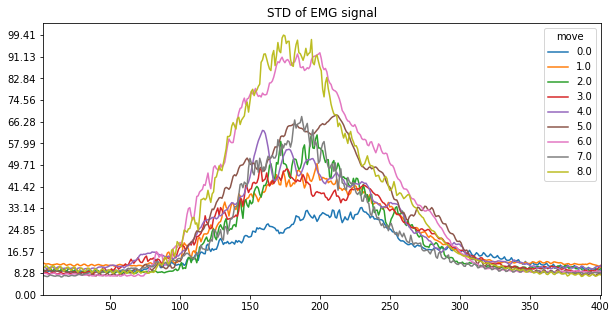

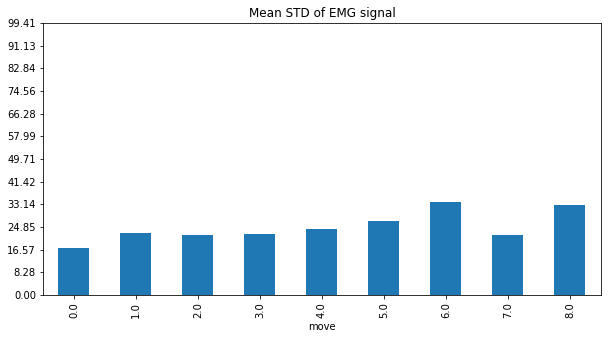

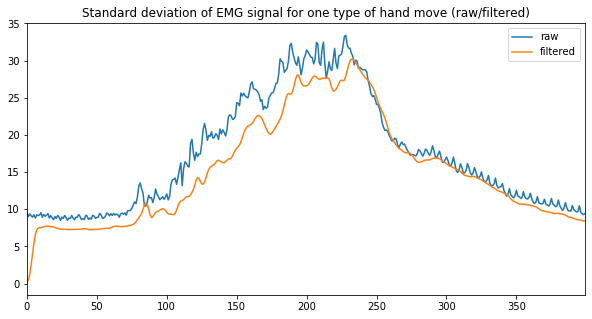

In [172]:
# display(df)
def plot_std_for_move(df, move_index):
    first_move = df[df['move'] == move_index]
    std_sum = first_move.describe()
    std_sum = std_sum.loc['std']
    std_sum = std_sum.T.drop(['move','subject'])
    std_sum = pd.DataFrame(std_sum)
    std_sum.plot(yticks=np.linspace(0,std_sum.max(),13), title=('Move of ' + str(i)))
    
group = df.drop(['subject'], axis=1).groupby(['move']).std()
# group = group.drop('subject')
group = group.T
group.plot(yticks=np.linspace(0,group.max().max(),13), title='STD of EMG signal', figsize=(10,5))

plt.figure()
group_mean = group.mean()
# display(group_mean)
group_mean.plot(kind='bar', yticks=np.linspace(0,group.max().max(),13), title='Mean STD of EMG signal', figsize=(10,5))

# for i in range(9):
#     plot_std_for_move(df, i)

pieces = df[df['move'] == 0].drop(columns=['subject','move']).values

for i in range(len(y)):
    pieces[i] = filter_signal(pieces[i])
filtered = pd.DataFrame(pieces)

filtered_group = pd.DataFrame(filtered.std())

unfiltered = pd.DataFrame(group[0])
unfiltered = unfiltered.reset_index(drop=True)
filtered_group = filtered_group.reset_index(drop=True)
# display(unfiltered.reset_index(drop=True))
# display(filtered_group)
final_group = pd.concat([unfiltered.T, filtered_group.T], keys=['raw', 'filtered'], ignore_index=True)
final_group = final_group.T
final_group.columns=['raw','filtered']
# display(final_group)
# display(group[[0]])
# display(filtered_group)
final_group.plot(title='Standard deviation of EMG signal for one type of hand move (raw/filtered)', figsize=(10,5))

## Дисперсия между разными жестами для одного субъекта

subject,0.0,1.0,2.0,3.0,4.0,5.0
2,7.535791,8.022288,7.925859,8.389543,14.147978,7.241068
3,7.301726,8.008426,8.323703,8.413503,14.032818,7.281119
4,7.519320,8.145788,8.209534,8.002241,14.499379,6.951174
5,7.742377,7.737330,7.802497,7.902210,14.794746,6.595621
6,7.299158,7.662644,7.506854,8.068980,14.577029,6.596013
...,...,...,...,...,...,...
397,5.767049,8.848427,7.257151,8.050971,14.146244,8.154589
398,5.441736,8.603053,7.358118,8.182863,14.110433,8.951548
399,5.158451,8.200051,7.052373,8.134361,14.476789,9.552702
400,5.394732,7.924958,7.040249,8.102385,14.625157,9.981414


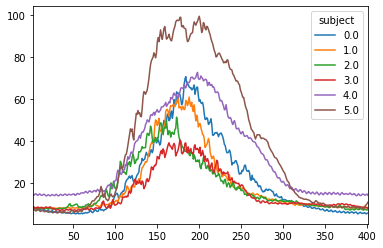

In [164]:
first_person_data = df # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
group.plot()

# Построения набора данных для нейросетевой фильтрации

In [182]:
display(df)

# Фильтруем все данные
pieces = df.drop(columns=['subject','move']).values

for i in range(len(pieces)):
    pieces[i] = filter_signal(pieces[i])

filtered_df = pd.DataFrame(pieces)
filtered_df['subject'] = df['subject']
filtered_df['move'] = df['move']

display(filtered_df)

train_mask = filtered_df['subject'] < 4
train_df = filtered_df[train_mask]
test_df = filtered_df[~train_mask]

,subject,move,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
0,0.0,0.0,1.270740,-10.895926,-14.729259,-4.895926,3.437407,-2.229259,-15.895926,-20.895926,...,-6.229259,-16.395926,-16.895926,-4.562593,3.937407,-2.062593,-12.395926,-14.729259,-4.229259,4.437407
1,0.0,0.0,7.270741,-4.895926,-6.729259,4.770741,13.270741,7.104074,-5.562593,-8.229259,...,8.270741,-3.395926,-3.229259,9.770741,14.937407,6.604074,-4.729259,-3.729259,8.270741,15.770741
2,0.0,0.0,-0.895926,-12.062593,-9.562593,2.937407,9.437407,1.104074,-9.562593,-8.729259,...,9.437407,-0.062593,4.104074,15.604074,19.270741,8.770741,-1.895926,1.437407,12.104074,16.437407
3,0.0,0.0,-14.562593,-23.562593,-18.562593,-6.229259,-2.229259,-11.895926,-20.562593,-15.062593,...,-0.229260,-9.395926,-3.562593,7.770741,9.270741,-3.895926,-11.895926,-5.062593,6.604074,8.270741
4,0.0,0.0,-2.062593,-10.729259,-4.062593,5.770741,5.270741,-6.562593,-12.729259,-4.729259,...,-8.395926,-15.729259,-7.395926,4.270741,3.604074,-7.895926,-13.062593,-3.562593,6.937407,3.937407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,5.0,8.0,-1.925307,-3.091973,-3.925307,-4.258640,-2.591973,-5.425307,-6.258640,-6.925307,...,-0.258640,-3.258640,-6.258640,-3.925307,-2.091973,-4.091973,-7.091973,-6.925307,-5.758640,-5.758640
2816,5.0,8.0,-4.591973,-2.091973,-1.758640,2.241360,3.408027,1.741360,-0.425307,-3.425307,...,-3.091973,-2.091973,-4.758640,-1.758640,2.074693,1.074693,-2.591973,-5.091973,-8.758640,-6.591973
2817,5.0,8.0,-0.925307,-5.258640,-0.591973,0.408027,-1.925307,0.741360,0.741360,-1.258640,...,-1.758640,-6.091973,-7.425307,-1.591973,2.241360,1.241360,-4.258640,-6.091973,-3.925307,-1.425307
2818,5.0,8.0,5.741360,-0.425307,1.574693,5.241360,4.908027,5.241360,-0.258640,0.408027,...,-5.591973,-8.591973,-8.258640,-4.758640,-6.758640,-3.258640,-2.425307,-1.925307,-1.591973,-4.258640


,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,subject,move
0,0.019184,-0.117956,-0.504385,-1.417703,-2.937734,-4.586769,-5.685070,-6.069641,-6.296389,-7.074130,...,-8.422348,-8.409098,-8.536900,-8.829320,-8.676672,-7.748808,-6.566791,-5.978246,0.0,0.0
1,0.109766,0.192368,0.388706,0.513958,0.438615,0.451957,0.966088,1.917473,2.703887,2.763526,...,5.965666,6.214184,6.039100,5.389569,4.914308,5.019141,5.256442,4.987919,0.0,0.0
2,-0.013526,-0.214920,-0.668653,-1.557169,-2.699478,-3.450672,-3.228912,-2.195842,-1.171587,-0.884318,...,10.048685,10.221023,9.952214,9.408643,9.212963,9.516529,9.671185,9.083959,0.0,0.0
3,-0.219850,-0.889058,-2.484337,-5.225749,-8.568529,-11.349164,-12.612922,-12.404340,-11.660034,-11.310731,...,0.643562,1.297163,1.217244,0.662370,0.370879,0.450769,0.341035,-0.349355,0.0,0.0
4,-0.031139,-0.237518,-0.644233,-1.372980,-2.175903,-2.563013,-2.316893,-1.846487,-1.766667,-2.210454,...,-2.693337,-2.727267,-3.565216,-4.556220,-4.799043,-4.286212,-3.743031,-3.632341,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2815,-0.029066,-0.117191,-0.349812,-0.794492,-1.425174,-2.185004,-2.900754,-3.533980,-4.071332,-4.549576,...,-7.222252,-5.255603,-3.855187,-3.294331,-3.382001,-3.722752,-4.126938,-4.595246,5.0,8.0
2816,-0.069325,-0.199757,-0.526066,-0.942765,-1.272278,-1.251427,-0.765267,-0.027302,0.509383,0.429804,...,-6.296145,-5.815165,-5.019292,-4.010560,-2.943733,-2.032305,-1.466981,-1.504227,5.0,8.0
2817,-0.013969,-0.113277,-0.286744,-0.644808,-1.077226,-1.348137,-1.387163,-1.171165,-0.764088,-0.424928,...,-3.849866,-3.597630,-3.514349,-3.499150,-3.291547,-2.774455,-2.138335,-1.881805,5.0,8.0
2818,0.086677,0.203849,0.536951,0.997265,1.489779,2.048830,2.590274,3.070298,3.261120,3.100397,...,-8.278415,-7.892552,-7.492027,-7.115104,-6.784341,-6.275770,-5.503194,-4.583612,5.0,8.0


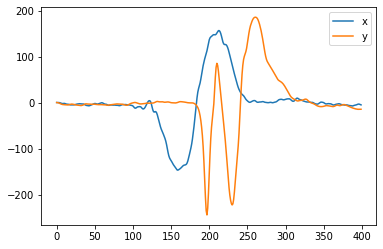

In [297]:
# Формируем X
# Формируем целевой вектор правильных ответов Y

# test_df = test_df.sample(frac=1)
size = test_df.count()[0]
X = []
y = []
for i in range(size):
    data = test_df.iloc[i]
    data_values = data.drop(['move', 'subject'])
    
    mask = (test_df['move'] == data.move)
    data_target = test_df[mask].sample(1)
    data_target = data_target.drop(['move', 'subject'], axis=1)
    X.append(data_values.values)
    y.append(data_target.values[0])
    
X = np.array(X)
y = np.array(y)
# Визуализация
plt.plot(X[0], label='x')
plt.plot(y[0], label='y')
plt.legend()

## Обучение

In [221]:
from keras.callbacks import EarlyStopping

X2 = np.zeros((len(X), 20, 20, 1))
for i in range(len(X)):
    data = X[i]
    X2[i] = np.reshape(data, (20,20,1))

X = X2

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True, verbose=2)
history = model.fit(X, y, verbose=2, epochs=200, batch_size=64, callbacks=[callback])

Epoch 1/200
 - 1s - loss: 874.1339 - accuracy: 0.0657
Epoch 2/200
 - 1s - loss: 857.8737 - accuracy: 0.0739
Epoch 3/200
 - 1s - loss: 849.1705 - accuracy: 0.0698
Epoch 4/200
 - 1s - loss: 838.4487 - accuracy: 0.0780
Epoch 5/200
 - 1s - loss: 863.3293 - accuracy: 0.0729
Epoch 6/200
 - 1s - loss: 841.4334 - accuracy: 0.0842
Epoch 7/200
 - 1s - loss: 831.6200 - accuracy: 0.0739
Epoch 8/200
 - 1s - loss: 835.7608 - accuracy: 0.0729
Epoch 9/200
 - 1s - loss: 815.5334 - accuracy: 0.0749
Epoch 10/200
 - 1s - loss: 807.3283 - accuracy: 0.0924
Epoch 11/200
 - 1s - loss: 793.5370 - accuracy: 0.0852
Epoch 12/200
 - 1s - loss: 787.6825 - accuracy: 0.0965
Epoch 13/200
 - 1s - loss: 796.4127 - accuracy: 0.0996
Epoch 14/200
 - 1s - loss: 808.7911 - accuracy: 0.0770
Epoch 15/200
 - 1s - loss: 795.8554 - accuracy: 0.0862
Epoch 16/200
 - 1s - loss: 787.0301 - accuracy: 0.0914
Epoch 17/200
 - 1s - loss: 776.2624 - accuracy: 0.0903
Epoch 18/200
 - 1s - loss: 768.3637 - accuracy: 0.0749
Epoch 19/200
 - 1s 

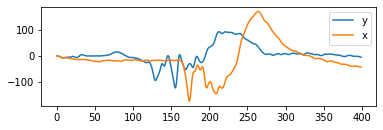

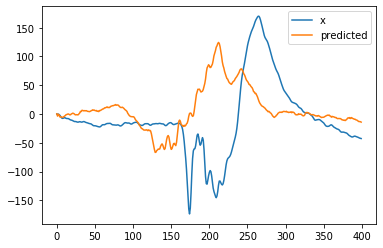

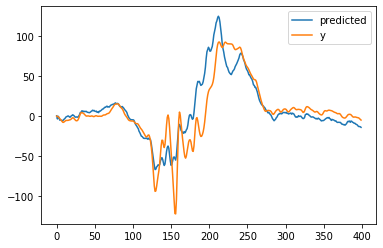

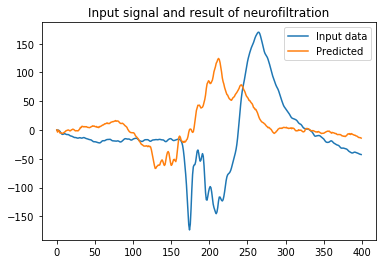

In [273]:
plt.plot(history.history['loss'])

example_index = 10
predicted = model.predict([[X[example_index]]])[0]
# print(predicted)

plt.subplot(2,1,1)
plt.plot(y[example_index], label='y')
plt.plot(X[example_index].reshape(400), label='x')
plt.legend()

plt.figure()
plt.plot(X[example_index].reshape(400), label='x')
plt.plot(predicted, label='predicted')
plt.legend()

plt.figure()
plt.plot(predicted, label='predicted')
plt.plot(y[example_index], label='y')
plt.legend()

plt.figure()
plt.plot(X[example_index].reshape(400), label='Input data')
plt.plot(predicted, label='Predicted')
plt.title('Input signal and result of neurofiltration')
plt.legend()

## Оценка. Подсчет статистики

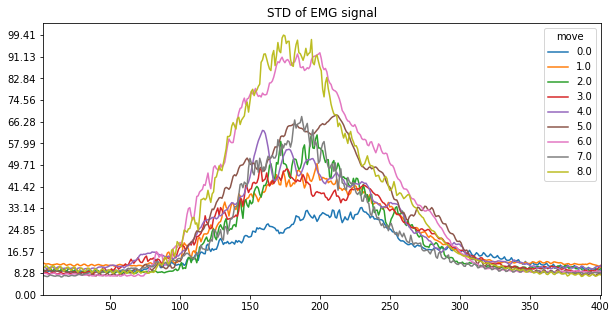

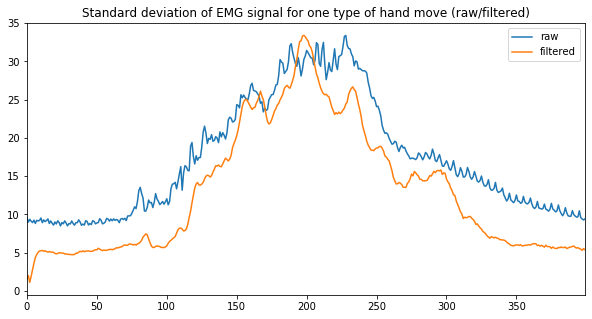

In [234]:
group = df.drop(['subject'], axis=1).groupby(['move']).std()
# group = group.drop('subject')
group = group.T
group.plot(yticks=np.linspace(0,group.max().max(),13), title='STD of EMG signal', figsize=(10,5))

pieces = df[df['move'] == 0].drop(columns=['subject','move']).values

for i in range(len(pieces)):
    filtered_data = filter_signal(pieces[i])
    pieces[i] = model.predict(np.array([filtered_data.reshape(20,20,1)]))
filtered = pd.DataFrame(pieces)

filtered_group = pd.DataFrame(filtered.std())

unfiltered = pd.DataFrame(group[0])
unfiltered = unfiltered.reset_index(drop=True)
filtered_group = filtered_group.reset_index(drop=True)

final_group = pd.concat([unfiltered.T, filtered_group.T], keys=['raw', 'filtered'], ignore_index=True)
final_group = final_group.T
final_group.columns=['raw','filtered']
final_group.plot(title='Standard deviation of EMG signal for one type of hand move (raw/filtered)', figsize=(10,5))

,Raw,filtered,difference
move,,,
0.0,17.250399,15.518867,1.731531
1.0,22.676796,20.281281,2.395516
2.0,21.768037,24.981289,-3.213252
3.0,22.270395,19.470890,2.799505
4.0,24.179709,19.058475,5.121233
5.0,27.142294,22.627266,4.515028
6.0,33.869529,31.273762,2.595767
7.0,22.040226,22.431728,-0.391502
8.0,32.881699,37.267712,-4.386012


0.04983871520624314

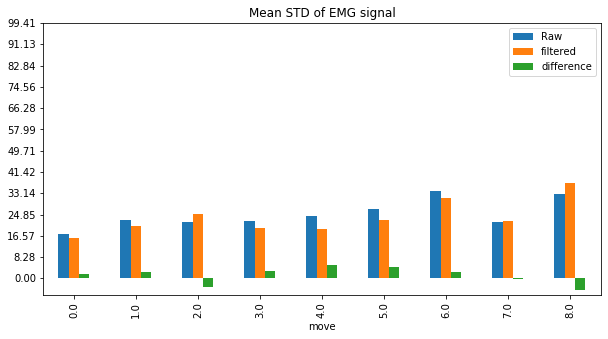

In [282]:
# Просто пример вывода
def plot_difference(group, group_filter):
    group_mean = group.mean()
    group_filter_mean = group_filter.mean()
    final_group = pd.concat([group_mean, group_filter_mean, group_mean - group_filter_mean], axis=1)
    final_group.columns = ['Raw', 'filtered', 'difference']

    display(final_group)
    final_group.plot(kind='bar', yticks=np.linspace(0,group.max().max(),13), title='Mean STD of EMG signal', figsize=(10,5))
    group_mean = final_group.mean()
    display(group_mean.difference / group_mean.Raw)

    
raw_data = df.drop(['subject'], axis=1).groupby(['move'])

filtered_data = df.drop(['subject'], axis=1)
filtered_values = filtered_data.drop(['move'], axis=1).values
# display(filtered_values)
filtered_values_new = np.zeros((len(filtered_values), 20, 20, 1))
for i in range(len(filtered_values)):
    filtered_values_new[i] = np.reshape(filtered_values[i], (20,20,1))
filtered_values = model.predict(filtered_values_new)
# display(filtered_values)

filtered_data = pd.DataFrame(filtered_values)
filtered_data['move'] = df['move']
# filtered_data.groupby(['move']).mean().T[0].plot()
# filtered_data.groupby(['move']).mean().T[7].plot()

filtered_data = filtered_data.groupby(['move'])
raw_group = raw_data.std()
raw_group = raw_group.T

filtered_group = filtered_data.std()
filtered_group = filtered_group.T


plot_difference(raw_group, filtered_group)


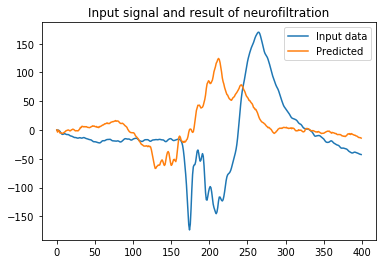

In [274]:
# Сравниваем конкретные сигналы до и после фильтрации
example_index = 10
plt.figure()
plt.plot(X[example_index].reshape(400), label='Input data')
plt.plot(predicted, label='Predicted')
plt.title('Input signal and result of neurofiltration')
plt.legend()

subject,0.0,1.0,2.0,3.0,4.0,5.0
2,7.535791,8.022288,7.925859,8.389543,14.147978,7.241068
3,7.301726,8.008426,8.323703,8.413503,14.032818,7.281119
4,7.519320,8.145788,8.209534,8.002241,14.499379,6.951174
5,7.742377,7.737330,7.802497,7.902210,14.794746,6.595621
6,7.299158,7.662644,7.506854,8.068980,14.577029,6.596013
...,...,...,...,...,...,...
397,5.767049,8.848427,7.257151,8.050971,14.146244,8.154589
398,5.441736,8.603053,7.358118,8.182863,14.110433,8.951548
399,5.158451,8.200051,7.052373,8.134361,14.476789,9.552702
400,5.394732,7.924958,7.040249,8.102385,14.625157,9.981414


subject,0.0,1.0,2.0,3.0,4.0,5.0
0,2.552478,2.674723,2.195716,1.492567,2.391272,3.641500
1,3.241614,2.386923,1.956151,1.770172,2.606166,4.204659
2,3.109441,2.537938,2.263699,1.697266,2.161091,3.798183
3,4.558493,3.609324,3.395919,2.467961,3.265229,6.002871
4,6.884690,4.961130,5.064939,3.570848,4.815454,8.654897
...,...,...,...,...,...,...
395,11.003548,8.908840,9.277572,6.768118,9.112215,15.126452
396,10.884156,9.103163,9.141689,6.801870,9.161898,15.033374
397,11.065773,8.990268,9.087555,6.696258,9.199657,15.040350
398,11.017942,9.162394,8.595027,6.803148,9.379669,15.061125


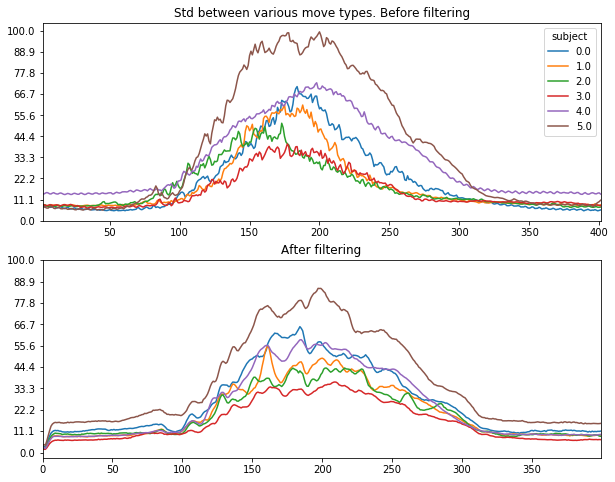

In [292]:
# Для разных жестов одного субъекта
fig, axes = plt.subplots(2, 1, figsize=(10,8))

# Raw data
first_person_data = df # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
group.plot(ax=axes[0], yticks=np.linspace(0,100,10), title='Std between various move types. Before filtering')

# Filtered data
filtered_data = pd.DataFrame(filtered_values)
filtered_data['move'] = df['move']
filtered_data['subject'] = df['subject']
first_person_data = filtered_data # df[df['subject'] == 0]
group = first_person_data.drop(['move'], axis=1).groupby(['subject']).std()
# group = group.drop('subject')
group = group.T
display(group)
group.plot(ax=axes[1], title='After filtering', yticks=np.linspace(0,100,10), legend=False)

In [298]:
model.save('model_14_07_20.h5')